## Question 1.  Social Media and Study Results

We  want  to  investigate  whether  there  is  a  link  between  the  use  of  social  media  and  the  performance  of
students.  We  ask  1064  students  how  many  hours  they  spend  on  average  per  day  using  social  media.    By
social media we  mean Facebook, YouTube, blogs, Twitter,  MySpace and LinkedIn.  We also check the final
score  of  these  students  at  the  end  of  the  year.  The  result  of  this  survey  can  be  found  in  the  file
"socialMediaVsPoints.csv".

a. Load the file.  Ensure that the number of hours is read as numbers.  Remove the rows with an
unknown value.  Now remove the rows with outliers. How many rows are left?
b. Make a histogram of the hours and the points separately.
c. What is the average number of hours a student spends on social media?
d. What is the standard deviation of the number of hours?  What does this mean?
e. What is the average score of the students?
f. What is the standard deviation of the score?
g. Make a scatterplot of the 2 variables.  What correlation do you expect?
h. Calculate the correlation between the 2 variables.  Do this also via the Z-scores (Pearson).  What did
you decide?
i. Which rank correlation coefficient do you find according to Kendall?  What does this value mean?
j. Does it make sense to determine a regression line here?  Why yes/no?  Determine the regression
line if it makes sense.

In [1]:
import pandas as pd
sm = pd.read_csv('socialMediaVsPoints.csv',delimiter=',',decimal='.',na_values="unknown")
sm

,hours,points
0,0.70,15
1,0.68,18
2,1.50,14
3,2.40,6
4,0.00,18
...,...,...
1059,2.64,15
1060,1.58,11
1061,1.53,18
1062,0.80,16


In [2]:
sm=sm.dropna()
sm

,hours,points
0,0.70,15
1,0.68,18
2,1.50,14
3,2.40,6
4,0.00,18
...,...,...
1059,2.64,15
1060,1.58,11
1061,1.53,18
1062,0.80,16


In [3]:
import numpy as np
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    I = Q3 - Q1
    low = Q1 - 1.5 * I
    high = Q3 + 1.5 * I
    return data[data.between(low,high)]
smn=pd.DataFrame()
smn['hours']=remove_outliers(sm['hours'])
smn['points']=remove_outliers(sm['points'])
smn

,hours,points
0,0.70,15.0
1,0.68,18.0
2,1.50,14.0
3,2.40,6.0
4,0.00,18.0
...,...,...
1059,2.64,15.0
1060,1.58,11.0
1061,1.53,18.0
1062,0.80,16.0


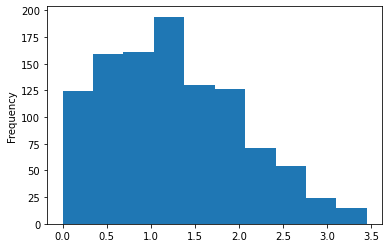

In [4]:
import matplotlib.pyplot as plt
plt.figure()
smn['hours'].plot.hist()
plt.show()

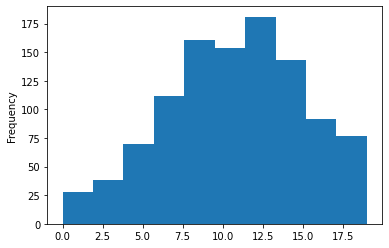

In [5]:
plt.figure()
smn['points'].plot.hist()
plt.show()

In [6]:
smn['hours'].mean()

1.264111531190925

In [7]:
smn['hours'].std()

0.7578589912098026

In [8]:
smn['points'].mean()

10.8125

In [9]:
smn['points'].std()

4.495903875614754

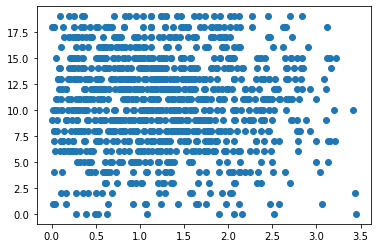

In [10]:
plt.figure()
plt.scatter(smn['hours'],smn['points'])
plt.show()

In [11]:
smn.corr(method='pearson')

,hours,points
hours,1.000000,-0.014669
points,-0.014669,1.000000


In [12]:
smn['hours'].corr(smn['points'])

-0.014669282578565855

In [13]:
smn.corr(method='kendall')

,hours,points
hours,1.000000,-0.006172
points,-0.006172,1.000000


no correlation
## QUESTION 2
Batteries for smartphones are manufactured in a factory.  The demand for these batteries varies considerably.
One suspects that if demand (and therefore production) increases, the percentage of exploding batteries also
increases (and thus: the quality drops due to the working pressure).  One wants to verify this.

A  measurement  is  made.    Every  day  the  number  of  batteries  produced  is  tracked.    If  a  defective  battery  is
returned  (or  one  explodes),  it  is  verified  on  which  day  it  was  produced.    The  data  can  be  found  in  the  file
"batteries.csv". The first column shows how many batteries were produced and the second column shows how
many batteries were defective.

a. Load the file.  There are lines with more than 2 values.  See what Python does with them when you
load the values.  Remove this line from the data.  There are outliers in the column Defect and
remove these.  How many rows do you have left now?
b. Make a scatterplot of the two variables.  Is there a linear correlation?
c. What correlation do you find with Kendall's method?
d. We are actually not interested in the absolute number of defective batteries, but we are interested in
the percentage.  So divide the number of defective batteries by the number of batteries produced.
What is the average percentage of defective batteries?
e. Make a scatterplot with the percentage of defective batteries.  Can you see the difference with the
previous graph?
f. Now calculate the correlation between the number of batteries produced and the percentage of
defective batteries.  What do you decide?
g. What is the value of R²?  What does it mean?
h. Draw the regression line on the scatterplot.  What are the values for the slope and intercept?
i. What is the standard estimated error?  What does this mean?
j. If production would be increased to 8000 batteries/day, how many defective batteries would you
expect then?
k. How many batteries can the factory produce per day so that there is no more than 1 percent defect?

In [14]:
import numpy as np
bt = pd.read_csv('batteries.csv',delimiter=',',na_values=np.nan)
bt

,#Produced,#Defects
0,1489,21
1,2162,34
2,2472,47
3,3116,77
4,4724,227
...,...,...
91,1959,23
92,1464,9
93,2368,23
94,2873,36


In [15]:
bt['#Defects']=remove_outliers(bt['#Defects'])
bt['#Defects']=pd.to_numeric(bt['#Defects'])
bt=bt.dropna()
bt

,#Produced,#Defects
0,1489,21.0
1,2162,34.0
2,2472,47.0
3,3116,77.0
5,1367,12.0
...,...,...
91,1959,23.0
92,1464,9.0
93,2368,23.0
94,2873,36.0


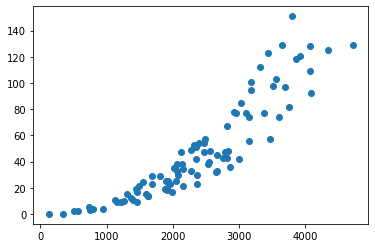

In [16]:
plt.figure()
plt.scatter(bt['#Produced'],bt['#Defects'])
plt.show()

In [17]:
bt.corr(method='kendall')

,#Produced,#Defects
#Produced,1.000000,0.814006
#Defects,0.814006,1.000000


In [18]:
bt['#Produced'].sum()/bt['#Defects'].sum()

49.86936834955852

C:\Users\filip\AppData\Local\Temp/ipykernel_14500/3700630677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btp['percentage']=(btp['#Defects']/btp['#Produced']) *100


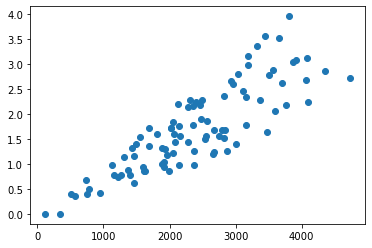

,#Produced,#Defects,percentage
0,1489,21.0,1.410343
1,2162,34.0,1.572618
2,2472,47.0,1.901294
3,3116,77.0,2.471117
5,1367,12.0,0.877835
...,...,...,...
91,1959,23.0,1.174068
92,1464,9.0,0.614754
93,2368,23.0,0.971284
94,2873,36.0,1.253046


In [19]:
btp=bt
btp['percentage']=(btp['#Defects']/btp['#Produced']) *100
plt.figure()
plt.scatter(btp['#Produced'],btp['percentage'])
plt.show()
btp

In [20]:
btp['#Produced'].corr(btp['percentage'])

0.8503092015597009

In [21]:
import math
def general_regression(x, y, degree=1, exp=False):
    data = pd.DataFrame({'x':x,'y':y})
    data.reset_index(drop=True, inplace=True)
    func=lambda x:x # def func(x): return[x]
    inv_func=lambda x:x
    if (exp):
        func=np.exp
        inv_func=np.log
    sy = data.y.std()
    model = np.polyfit(x, inv_func(y), degree)
    line = np.poly1d(model)
    predict = lambda x:func(line(x))
    data['y_pred'] = pd.Series(predict(x))
    se = math.sqrt(((data.y_pred-data.y)**2).mean())
    R2 = 1-(se**2)/(sy**2)
    result = [se, R2, predict]
    index = ['se', 'R2', 'predict']
    for i in range(1,len(model)+1):
        result = np.append(result, model[-i])
        index += chr(i+96) # to obtain the characters a,b,...
    result = pd.Series(result)
    result.index = index
    return result
general_regression(btp['#Produced'],btp['percentage'],1)

se                                                  0.449347
R2                                                  0.726004
predict    <function general_regression.<locals>.<lambda>...
a                                                  -0.055872
b                                                   0.000744
dtype: object

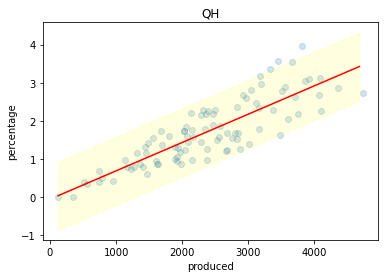

In [22]:

def linear_regression(x: pd.Series, y: pd.Series) -> list:
    model = np.polyfit(x, y, 1)
    predict = np.poly1d(model)
    xx = np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
    yy = predict(xx)
    y_pred = predict(x)
    se = math.sqrt(((y_pred - y) ** 2).mean())
    return [xx, yy, se]
def draw_linear_regression_scatter_plot(x: pd.Series, y: pd.Series, x_label: str, y_label: str, title: str) -> None:
    xx, yy, se = linear_regression(x, y)
    plt.scatter(x, y, alpha=0.2)
    plt.plot(xx, yy, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.fill_between(xx, yy - 2 * se, yy + 2 * se, color='#FFFF0020')
    plt.show()

draw_linear_regression_scatter_plot(btp['#Produced'],btp['percentage'],"produced","percentage","QH")

In [23]:
general_regression(btp['#Produced'],btp['percentage'],1).se

0.4493474606782796

In [24]:
#5%?
btp[btp['percentage']>1]
#1880?

,#Produced,#Defects,percentage
0,1489,21.0,1.410343
1,2162,34.0,1.572618
2,2472,47.0,1.901294
3,3116,77.0,2.471117
7,2755,43.0,1.560799
...,...,...,...
84,3009,42.0,1.395813
87,1439,19.0,1.320361
91,1959,23.0,1.174068
94,2873,36.0,1.253046


## Question 3  Stress and Weather Conditions

In this study we wonder what influence the weather has on the feeling of stress.  We asked a number of people
to write down their feelings of stress every day.  With these data (see the file stress.csv) we noted the average
temperature, humidity and amount of rainfall on that day.

a. Load the data.  Which columns contain NA values? Delete the rows with NA values.  Remove the
rows with extreme outliers during rainfall.  The humidity should not exceed 100. Remove the rows
where this is the case. How many rows do you have left?
b. Which measurement level do the columns have?
c. What is the average temperature, humidity and railfall?
d. Find the correlation between stress and temperature.  Which method should you use? Which value
do you find?  What does it mean?
e. Find the correlation between stress and humidity.  What value do you find?  What does it mean?
f. Find the correlation between stress and rainfall.  What value do you find?  What does it mean?
g. Which factors play a role in the feeling of stress

In [25]:
stress = pd.read_csv('stress.csv',delimiter='\t',decimal=',')
stress=stress.dropna()
stress

,stress,temp,rainfall,humidity
0,normal,18.3,2.5,72.0
1,mildly stressed,7.4,2.7,69.0
2,mildly stressed,12.6,2.5,76.0
3,normal,14.1,2.3,73.0
4,mildly stressed,12.8,3.1,85.0
...,...,...,...,...
1090,stressed,3.1,1.6,87.0
1091,mildly stressed,11.0,2.5,95.0
1092,mildly stressed,7.3,2.4,83.0
1093,mildly stressed,4.6,2.1,79.0


In [26]:
def remove_extreme_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    I = Q3 - Q1
    low = Q1 - 3 * I
    high = Q3 + 3 * I
    return data[data.between(low,high)]
temp = pd.DataFrame()
temp['rainfall']=remove_extreme_outliers(stress['rainfall'])
stress['rainfall']=temp
stress=stress[stress['humidity']<=100]
stress

,stress,temp,rainfall,humidity
0,normal,18.3,2.5,72.0
1,mildly stressed,7.4,2.7,69.0
2,mildly stressed,12.6,2.5,76.0
3,normal,14.1,2.3,73.0
4,mildly stressed,12.8,3.1,85.0
...,...,...,...,...
1090,stressed,3.1,1.6,87.0
1091,mildly stressed,11.0,2.5,95.0
1092,mildly stressed,7.3,2.4,83.0
1093,mildly stressed,4.6,2.1,79.0


stress -> ordinal
temp -> interval
rainfall -> ratio
humidity -> ratio

In [27]:
stress['temp'].mean()

10.319431714023837

In [28]:
stress['rainfall'].mean()

2.3707339449541265

In [29]:
stress['humidity'].mean()

79.8698441796517

In [30]:
stress['temp'].corr(stress['stress'],method='kendall')

0.020712132477663885

In [31]:
stress['humidity'].corr(stress['stress'],method='kendall')

-0.029220240982506505

In [32]:
stress['rainfall'].corr(stress['stress'],method='kendall')

0.009480900491528603

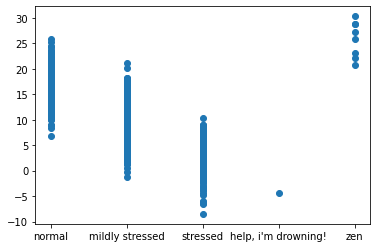

In [33]:
plt.figure()
plt.scatter(stress['stress'],stress['temp'])
plt.show()


## Question 4  When to Charge My Smartphone?

We know that the battery charge of a smartphone drops sharply when you use it a lot.  Now we want to map
this out.  We have a number of test specimens fully charged and give them to people who use smartphones.
When the battery charge reaches 20%, the people note the number of hours of standby and the number of
hours used.  You can find these data in "smartphones.csv".

a. Load the data.  How many rows are there?
b. Calculate per device the total number of hours it was on up to 20% (hours used and standby hours).
How many hours do you find for the first device?
c. We are now looking for a link between the number of hours the smartphone was used and the total
number of hours until the battery was at 20%.  First make a scatterplot of these 2 variables.  What do
you see?
d. Calculate the correlation according to Pearson and Kendall.  What do these values say?
e. Draw the regression line on the scatterplot.  What are the values for the slope and intercept?
f. What is the value of R²?  What is the meaning?
g. What is the standard estimation error?  What does it mean?
h. If someone needs a smartphone for 3 hours, how long will it take before the smartphone needs to be
charged?
i. Suppose you are looking for a link between the percentage of use and the total time before you need
to charge.  Find the right variables and create a scatterplot.  What do you see?  Can you use linear
regression for this?  Why or why not?  Which regression model is best in this case?  What is the final
formula for the model?

In [34]:
sp = pd.read_csv('smartphones.csv',delimiter=',',decimal='.')
sp

,usage,standby
0,2.883495,93.622233
1,7.009684,25.832790
2,0.966821,75.322096
3,4.579412,63.088735
4,1.903283,94.866359
...,...,...
95,4.635983,70.667516
96,5.428050,70.520763
97,4.206757,61.587526
98,4.151233,82.306191


In [35]:
sp.usage+sp.standby

0     96.505727
1     32.842474
2     76.288917
3     67.668147
4     96.769642
        ...    
95    75.303499
96    75.948813
97    65.794284
98    86.457424
99    80.980386
Length: 100, dtype: float64

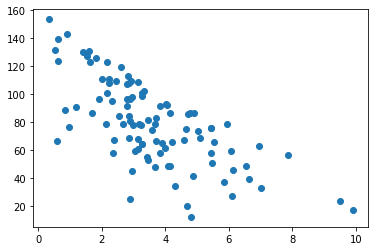

In [40]:
spn=sp
spn['total']=spn.usage+spn.standby
plt.figure()
plt.scatter(spn.usage,spn.total)
plt.show()

In [41]:
sp.corr(method='pearson')

,usage,standby,total
usage,1.000000,-0.726291,-0.696947
standby,-0.726291,1.000000,0.999127
total,-0.696947,0.999127,1.000000


In [42]:
sp.corr(method='kendall')

,usage,standby,total
usage,1.000000,-0.541010,-0.517576
standby,-0.541010,1.000000,0.976566
total,-0.517576,0.976566,1.000000


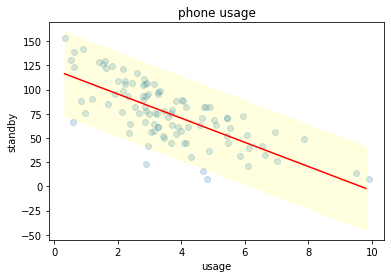

In [44]:
draw_linear_regression_scatter_plot(sp.usage,sp.standby,"usage","standby","phone usage")

In [45]:
general_regression(sp.usage,sp.standby,1)

se                                                 21.419936
R2                                                  0.532223
predict    <function general_regression.<locals>.<lambda>...
a                                                 120.258782
b                                                 -12.470289
dtype: object

R2->0.53
se->21.42